In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
data = df.drop(['CustomerID', 'Gender'], axis=1)

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

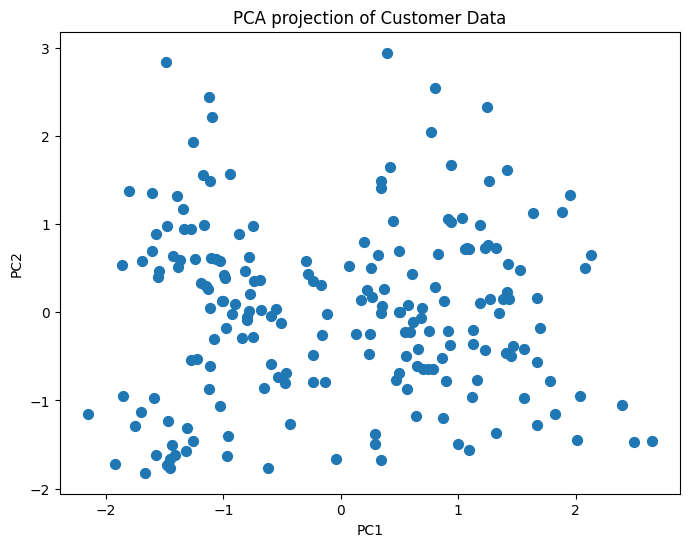

In [9]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50)
plt.title('PCA projection of Customer Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

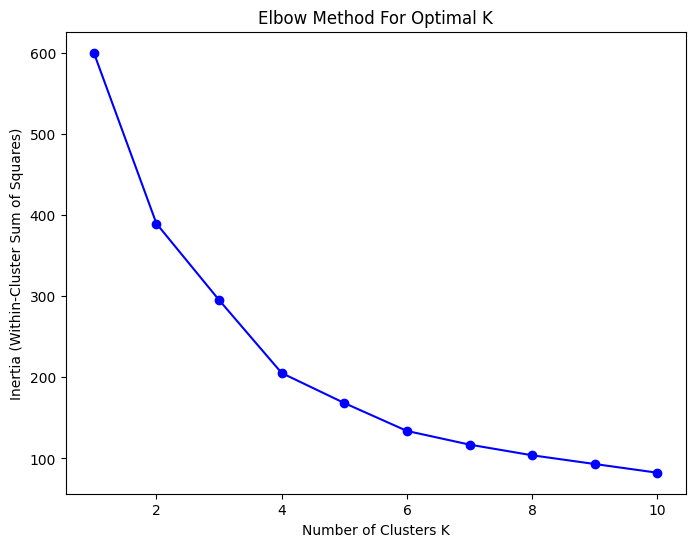

In [12]:
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal K')
plt.show()

In [13]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

In [15]:
df['Cluster'] = clusters

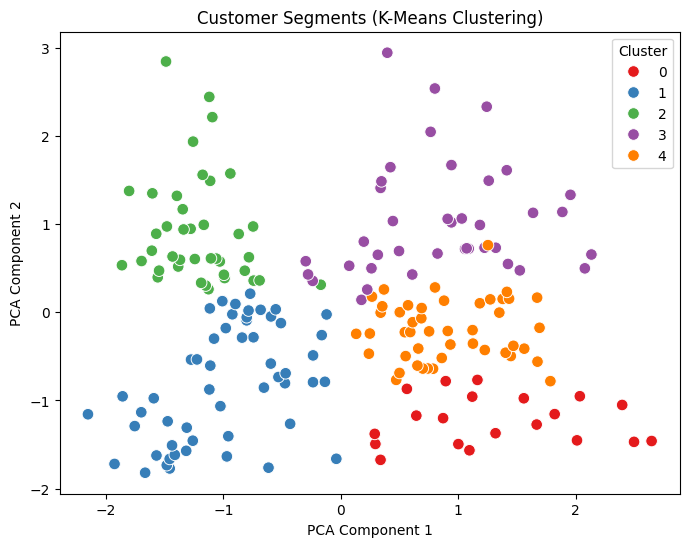

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='Set1', s=70)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")

Silhouette Score for k=5: 0.417
